In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uploaded = files.upload()

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset.csv


In [3]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# 1.Попередній аналіз даних


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df.shape

(374, 13)

In [6]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [9]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# 2.Перевести типи даних в числові

In [11]:
df['Occupation'].value_counts()

,count
Occupation,
Nurse,73
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Scientist,4
Software Engineer,4


In [12]:
occupation_map = {
    'Nurse': 1,
    'Doctor': 2,
    'Engineer': 3,
    'Lawyer': 4,
    'Teacher': 5,
    'Accountant': 6,
    'Salesperson': 7,
    'Scientist': 8,
    'Software Engineer': 9,
    'Sales Representative': 10,
    'Manager': 11
}

df['Occupation'] = df['Occupation'].map(occupation_map)

In [13]:
df['Gender'].value_counts()

,count
Gender,
Male,189
Female,185


In [14]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [15]:
df['BMI Category'].value_counts()

,count
BMI Category,
Normal,195
Overweight,148
Normal Weight,21
Obese,10


In [16]:
df['BMI Category'] = df['BMI Category'].replace({'Normal Weight': 'Normal'})
bmi_map = {'Normal': 0, 'Overweight': 1, 'Obese': 2}
df['BMI Category'] = df['BMI Category'].map(bmi_map)

In [17]:
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
Sleep Apnea,78
Insomnia,77


In [18]:
df['Sleep Disorder'] = df['Sleep Disorder'].map({'Sleep Apnea': 0, 'Insomnia': 1})

In [22]:
df['Blood Pressure'].value_counts()

,count
Blood Pressure,
130/85,99
140/95,65
125/80,65
120/80,45
115/75,32
135/90,27
140/90,4
125/82,4
128/85,3


In [23]:
# Розділяємо стовпець на два нові числові
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

In [24]:
df.drop(columns=['Blood Pressure'], inplace=True)

# 3. Вивести оновлений датасет

In [25]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,1,27,9,6.1,6,42,6,1,77,4200,NaN,126,83
1,2,1,28,2,6.2,6,60,8,0,75,10000,NaN,125,80
2,3,1,28,2,6.2,6,60,8,0,75,10000,NaN,125,80
3,4,1,28,10,5.9,4,30,8,2,85,3000,0.0,140,90
4,5,1,28,10,5.9,4,30,8,2,85,3000,0.0,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,1,8.1,9,75,3,1,68,7000,0.0,140,95
370,371,0,59,1,8.0,9,75,3,1,68,7000,0.0,140,95
371,372,0,59,1,8.1,9,75,3,1,68,7000,0.0,140,95
372,373,0,59,1,8.1,9,75,3,1,68,7000,0.0,140,95


# 4.Перевірити наявність пропущених даних

In [26]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0


# 5.Замінити пропущені значення на моду

In [27]:
mode_value = df['Sleep Disorder'].mode()[0]
df['Sleep Disorder'].fillna(mode_value, inplace=True)

<ipython-input-27-105e866afdcf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna(mode_value, inplace=True)


In [28]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0


In [29]:
df.describe()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,0.505348,42.184492,3.574866,7.132086,7.312834,59.171123,5.385027,0.449198,70.165775,6816.844920,0.205882,128.553476,84.649733
std,108.108742,0.500641,8.673133,2.133232,0.795657,1.196956,20.830804,1.774526,0.549274,4.135676,1617.915679,0.404887,7.748118,6.161611
min,1.000000,0.000000,27.000000,1.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000,0.000000,115.000000,75.000000
25%,94.250000,0.000000,35.250000,2.000000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,5600.000000,0.000000,125.000000,80.000000
50%,187.500000,1.000000,43.000000,3.000000,7.200000,7.000000,60.000000,5.000000,0.000000,70.000000,7000.000000,0.000000,130.000000,85.000000
75%,280.750000,1.000000,50.000000,5.000000,7.800000,8.000000,75.000000,7.000000,1.000000,72.000000,8000.000000,0.000000,135.000000,90.000000
max,374.000000,1.000000,59.000000,11.000000,8.500000,9.000000,90.000000,8.000000,2.000000,86.000000,10000.000000,1.000000,142.000000,95.000000


In [30]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,1,27,9,6.1,6,42,6,1,77,4200,0.0,126,83
1,2,1,28,2,6.2,6,60,8,0,75,10000,0.0,125,80
2,3,1,28,2,6.2,6,60,8,0,75,10000,0.0,125,80
3,4,1,28,10,5.9,4,30,8,2,85,3000,0.0,140,90
4,5,1,28,10,5.9,4,30,8,2,85,3000,0.0,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,1,8.1,9,75,3,1,68,7000,0.0,140,95
370,371,0,59,1,8.0,9,75,3,1,68,7000,0.0,140,95
371,372,0,59,1,8.1,9,75,3,1,68,7000,0.0,140,95
372,373,0,59,1,8.1,9,75,3,1,68,7000,0.0,140,95


# 6. Вивести матрицю кореляції

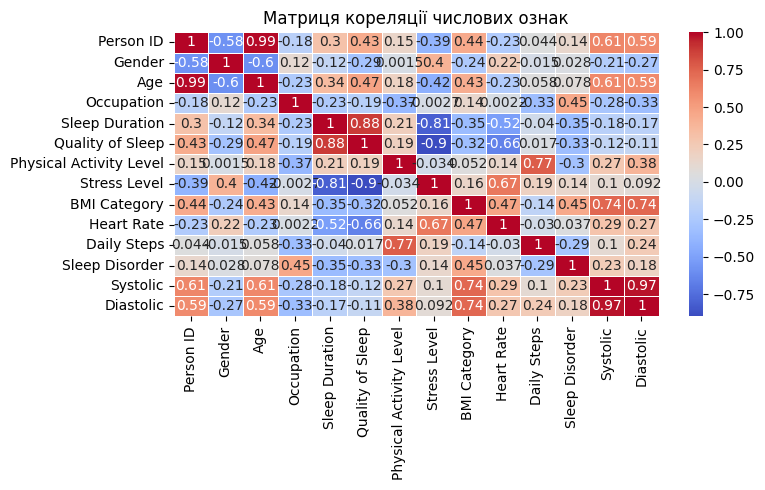

In [31]:
cor_matrix = df.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Матриця кореляції числових ознак")
plt.tight_layout()
plt.show()

# 7. Побудувати по 3 графіки: matplotlib, plotly, seaborn, altair

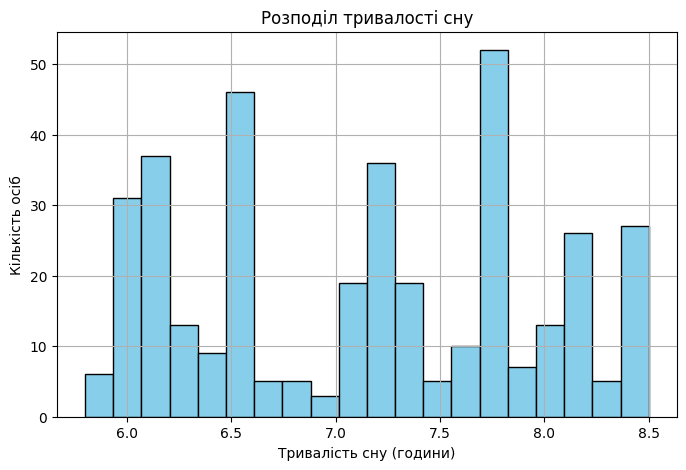

In [32]:
plt.figure(figsize=(8,5))
plt.hist(df['Sleep Duration'], bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл тривалості сну')
plt.xlabel('Тривалість сну (години)')
plt.ylabel('Кількість осіб')
plt.grid(True)
plt.show()

<ipython-input-33-f83942ec1e71>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Daily Steps', palette='pastel')


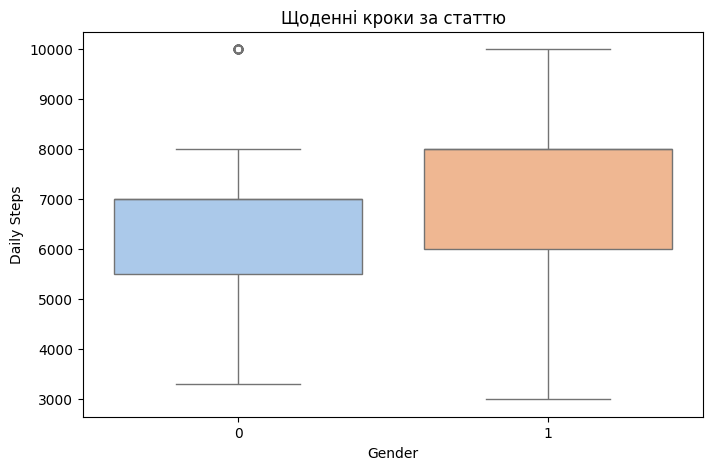

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Gender', y='Daily Steps', palette='pastel')
plt.title('Щоденні кроки за статтю')
plt.show()

In [34]:
import plotly.express as px

fig = px.scatter(df, x='Sleep Duration', y='Stress Level',
                 color='Gender',
                 title='Зв’язок між тривалістю сну і рівнем стресу',
                 labels={'Sleep Duration': 'Тривалість сну (год)', 'Stress Level': 'Рівень стресу'})
fig.show()

In [35]:
import altair as alt
import pandas as pd

# Для altair краще використовувати чисту копію без NaN
df_alt = df.copy()
df_alt = df_alt[df_alt['Sleep Disorder'].notna()]

chart = alt.Chart(df_alt).mark_bar().encode(
    x=alt.X('Heart Rate:Q', bin=True, title='Пульс (ударів/хв)'),
    y='count()',
    color='Sleep Disorder:N'
).properties(
    title='Розподіл пульсу за типом порушення сну',
    width=600,
    height=400
)

chart.show()

alt.Chart(...)

**Висновок:**
Було проведено попередню обробку даних: переглянуто структуру DataFrame, виявлено та оброблено пропущені значення. Об'єднано схожі категорії, категоріальні ознаки закодовано числовими значеннями. Стовпець Blood Pressure розділено на систолічний і діастолічний тиск. Також побудовано графіки за допомогою matplotlib, seaborn, plotly та altair для аналізу розподілу та взаємозв’язків між ознаками.